C:\Users\tnt21\.conda\envs\TF_2_7_cloned_env\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


(45000, 32, 32, 3) (45000, 100) (5000, 32, 32, 3) (5000, 100) (10000, 32, 32, 3) (10000, 100)
352/352 [==============================] - 6s 18ms/step - loss: 0.9658 - accuracy: 0.7437 - val_loss: 3.1496 - val_accuracy: 0.4590


  4/352 [..............................] - ETA: 7s - loss: 1.5304 - accuracy: 0.6484WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0075s vs `on_train_batch_end` time: 0.0100s). Check your callbacks.


352/352 [==============================] - 6s 18ms/step - loss: 1.6765 - accuracy: 0.6018 - val_loss: 4.4319 - val_accuracy: 0.4468


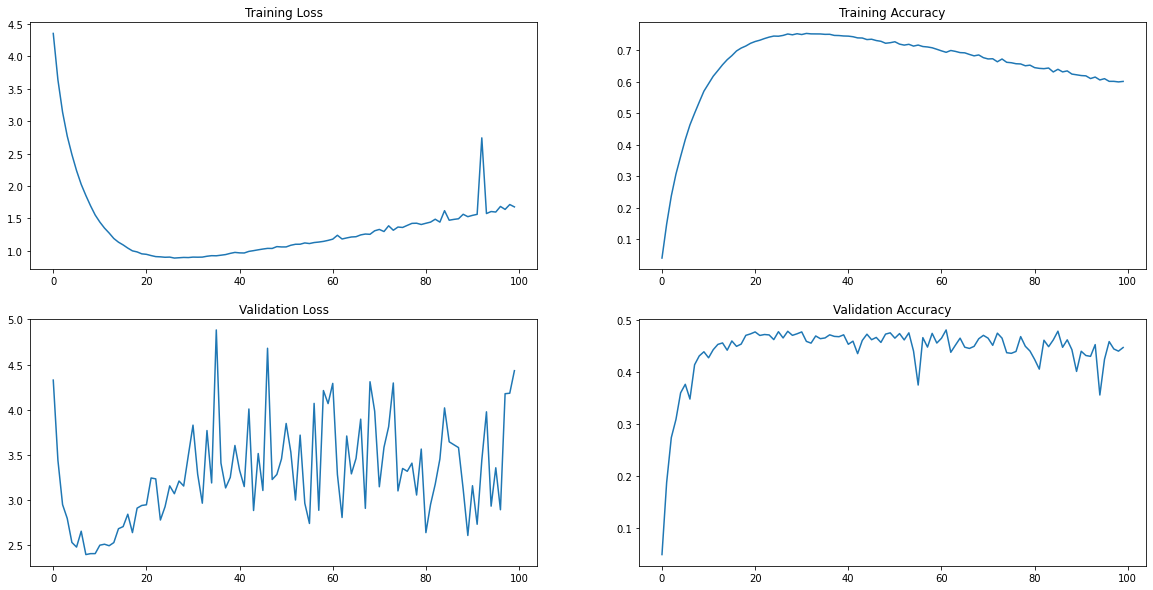

313/313 [==============================] - 1s 3ms/step - loss: 4.2032 - accuracy: 0.4690


[4.203223705291748, 0.4690000116825104]

In [1]:
#Normal training
import random
import os
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'# 2 = INFO and WARNING messages are not printed
from livelossplot import PlotLossesKeras
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
input_shape = (32, 32, 3)
# Load in the data
cifar100 = tf.keras.datasets.cifar100

#Adam_optimizer_LR=Adam(lr=0.0003)
rmsprop_LR = RMSprop(lr=0.001)
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
#print(tf.__version__)  
batch_size = 128
num_of_used_samples=45000
num_epochs=100
negotiation_rate=0#Normal training
num_classes = 100
#print(y_train)
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()
#print(y_train)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#print(y_train)
train_loss_list=[]
train_acc_list=[]
val_loss_list=[]
val_acc_list=[]
# number of classes
x_valid=x_train[num_of_used_samples:,:,:,:]
y_valid=y_train[num_of_used_samples:,:]
x_train=x_train[:num_of_used_samples,:,:,:]
y_train=y_train[:num_of_used_samples,:]
x_test=x_test#[:num_of_used_samples,:,:,:]
y_test=y_test#[:num_of_used_samples,:]
print(x_train.shape, y_train.shape,x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)
model = keras.Sequential([keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(num_classes, activation="softmax"),])

model.compile(loss="categorical_crossentropy", optimizer=rmsprop_LR, metrics=["accuracy"])

import gc
class Garbage_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

for train_phase in range(num_epochs):
    history=model.fit(x_train, y_train, batch_size=batch_size, 
                      shuffle=True,
                      validation_data=(x_valid,y_valid), epochs=1,verbose=1,
                     callbacks=[Garbage_Callback()])
    pred_train= model.predict(x_train)
    cost_compensation=(y_train-pred_train)*negotiation_rate*train_phase
    y_train=y_train-cost_compensation
    train_loss_list.append(history.history["loss"])
    train_acc_list.append(history.history["accuracy"])
    val_loss_list.append(history.history["val_loss"])
    val_acc_list.append(history.history["val_accuracy"])
#put the losses and accs in order!
new_train_loss_list=[]
for my_element in train_loss_list:
    for my_item in my_element:
        new_train_loss_list.append(my_item)
new_train_acc_list=[]
for my_element in train_acc_list:
    for my_item in my_element:
        new_train_acc_list.append(my_item)
new_val_loss_list=[]
for my_element in val_loss_list:
    for my_item in my_element:
        new_val_loss_list.append(my_item)
new_val_acc_list=[]
for my_element in val_acc_list:
    for my_item in my_element:
        new_val_acc_list.append(my_item)
# visualize data by plotting images
fig, ax = plt.subplots(2, 2,figsize=(20,10))
ax[0][0].plot(new_train_loss_list)
ax[0][0].set_title('Training Loss')
ax[0][1].plot(new_train_acc_list)
ax[0][1].set_title('Training Accuracy')
ax[1][0].plot(new_val_loss_list)
ax[1][0].set_title('Validation Loss')
ax[1][1].plot(new_val_acc_list)
ax[1][1].set_title('Validation Accuracy')
plt.show()
pred_test= model.evaluate(x_test,y_test)
pred_test

(45000, 32, 32, 3) (45000, 100) (5000, 32, 32, 3) (5000, 100) (10000, 32, 32, 3) (10000, 100)
352/352 [==============================] - 7s 19ms/step - loss: 0.9549 - accuracy: 0.7970 - val_loss: 2.9161 - val_accuracy: 0.4774


  5/352 [..............................] - ETA: 5s - loss: 0.9214 - accuracy: 0.8078WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_train_batch_end` time: 0.0139s). Check your callbacks.


352/352 [==============================] - 6s 17ms/step - loss: 0.9166 - accuracy: 0.8137 - val_loss: 3.2639 - val_accuracy: 0.4814


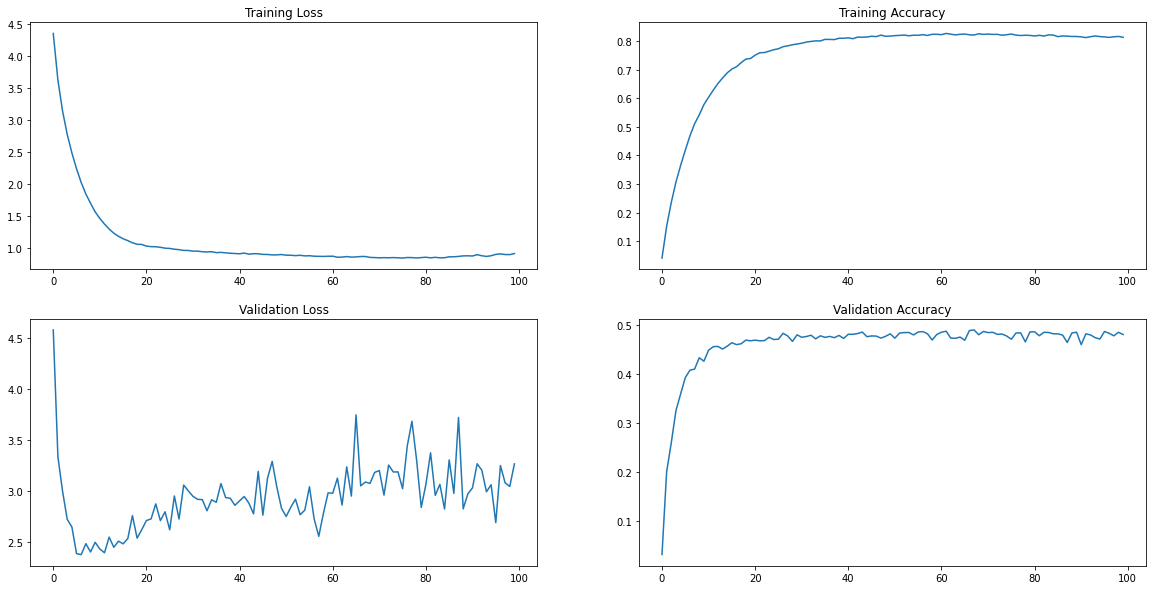

313/313 [==============================] - 1s 2ms/step - loss: 3.1572 - accuracy: 0.4992


[3.157245397567749, 0.4991999864578247]

In [2]:
##Negotiated training
import random
import os
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'# 2 = INFO and WARNING messages are not printed
from livelossplot import PlotLossesKeras
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
input_shape = (32, 32, 3)
# Load in the data
cifar100 = tf.keras.datasets.cifar100

#Adam_optimizer_LR=Adam(lr=0.0003)
rmsprop_LR = RMSprop(lr=0.001)
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
#print(tf.__version__)  
batch_size = 128
num_of_used_samples=45000
num_epochs=100
negotiation_rate=0.001#Negotiated training
num_classes = 100
#print(y_train)
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()
#print(y_train)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#print(y_train)
train_loss_list=[]
train_acc_list=[]
val_loss_list=[]
val_acc_list=[]
# number of classes
x_valid=x_train[num_of_used_samples:,:,:,:]
y_valid=y_train[num_of_used_samples:,:]
x_train=x_train[:num_of_used_samples,:,:,:]
y_train=y_train[:num_of_used_samples,:]
x_test=x_test#[:num_of_used_samples,:,:,:]
y_test=y_test#[:num_of_used_samples,:]
print(x_train.shape, y_train.shape,x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)
model = keras.Sequential([keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(num_classes, activation="softmax"),])

model.compile(loss="categorical_crossentropy", optimizer=rmsprop_LR, metrics=["accuracy"])

import gc
class Garbage_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

for train_phase in range(num_epochs):
    history=model.fit(x_train, y_train, batch_size=batch_size, 
                      shuffle=True,
                      validation_data=(x_valid,y_valid), epochs=1,verbose=1,
                     callbacks=[Garbage_Callback()])
    pred_train= model.predict(x_train)
    cost_compensation=(y_train-pred_train)*negotiation_rate*train_phase
    y_train=y_train-cost_compensation
    train_loss_list.append(history.history["loss"])
    train_acc_list.append(history.history["accuracy"])
    val_loss_list.append(history.history["val_loss"])
    val_acc_list.append(history.history["val_accuracy"])
#put the losses and accs in order!
new_train_loss_list=[]
for my_element in train_loss_list:
    for my_item in my_element:
        new_train_loss_list.append(my_item)
new_train_acc_list=[]
for my_element in train_acc_list:
    for my_item in my_element:
        new_train_acc_list.append(my_item)
new_val_loss_list=[]
for my_element in val_loss_list:
    for my_item in my_element:
        new_val_loss_list.append(my_item)
new_val_acc_list=[]
for my_element in val_acc_list:
    for my_item in my_element:
        new_val_acc_list.append(my_item)
# visualize data by plotting images
fig, ax = plt.subplots(2, 2,figsize=(20,10))
ax[0][0].plot(new_train_loss_list)
ax[0][0].set_title('Training Loss')
ax[0][1].plot(new_train_acc_list)
ax[0][1].set_title('Training Accuracy')
ax[1][0].plot(new_val_loss_list)
ax[1][0].set_title('Validation Loss')
ax[1][1].plot(new_val_acc_list)
ax[1][1].set_title('Validation Accuracy')
plt.show()
pred_test= model.evaluate(x_test,y_test)
pred_test

In [3]:
print("endddd")

endddd
